In [1]:
import os,sys, re
from importlib import reload
import numpy as np
import pandas as pd
from Bio.Seq import reverse_complement
#import torch
print(os.getpid())
sys.path.append(r'C:\Softwares\Github\MerScope01')

from ChromAn.src.library_tools.primers import load_fasta_to_DataFrame
#import MERFISH_probe_design.probe_design.OTTable_dict as ot

1476


In [2]:
from ChromAn.src.file_io.data_organization import Color_Usage, search_fovs_in_folders, color_usage_kwds

In [3]:
import ChromAn
reload(ChromAn.src.file_io.data_organization)
from ChromAn.src.file_io.data_organization import Data_Organization, search_fovs_in_folders
from ChromAn.src.file_io.dax_process import DaxProcesser
from ChromAn.src.visual_tools.interactive import imshow_mark_3d

In [14]:
# where the original data saves
data_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\4T1Tumor\20230622-4T1tumor_primary_F133section2'
experiment_date = os.path.basename(data_folder).split('-')[0]
print(experiment_date)
# Color usage file marks the organization of imaging files
color_usage_filename = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\4T1Tumor\20230622-4T1tumor_primary_F133section2\Analysis\Color_Usage.csv'

20230622


In [5]:
# visualize some images:
folders, fovs = search_fovs_in_folders(data_folder)
sel_fov = 10

test_ref_filename = os.path.join(folders[0], fovs[sel_fov])
test_filename = os.path.join(folders[1], fovs[sel_fov])
# load ref
daxp_ref = DaxProcesser(test_ref_filename)
daxp_ref._load_image()
daxp_ref._corr_hot_pixels()
# load
daxp = DaxProcesser(test_filename)
daxp._load_image()
daxp_ref._corr_hot_pixels()

- searching in folder: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\4T1Tumor\20230622-4T1tumor_primary_F133section2
-- 11 folders, 217 fovs detected.
Initialize DaxProcesser for file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\4T1Tumor\20230622-4T1tumor_primary_F133section2\H0M1\Conv_zscan_010.dax
- New save file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\4T1Tumor\20230622-4T1tumor_primary_F133section2\H0M1\Conv_zscan_010_processed.hdf5
-- all used channels: ['750', '647', '488', '405']
-- single image size: [  15 2048 2048]
- Loaded images for channels:['750', '647', '488', '405'] in 2.189s.
- Correct hot_pixel for channels: ['750', '647', '488', '405']
-- Keep channels: ['750', '647', '488', '405'] for corr_hot_pixel.
- Start hot_pixel correction for channels:['750', '647', '488', '405'].
-- corrected hot_pixel for channel 750 in 0.930s.
-- corrected hot_pixel for channel 647 in 0.866s.
-- corrected hot_pixel for channel 488 in 0.929s.
-- corrected hot_pixel for chann

### Quickly visualize bead image to find bead-localizing z-frame

<IPython.core.display.Javascript object>


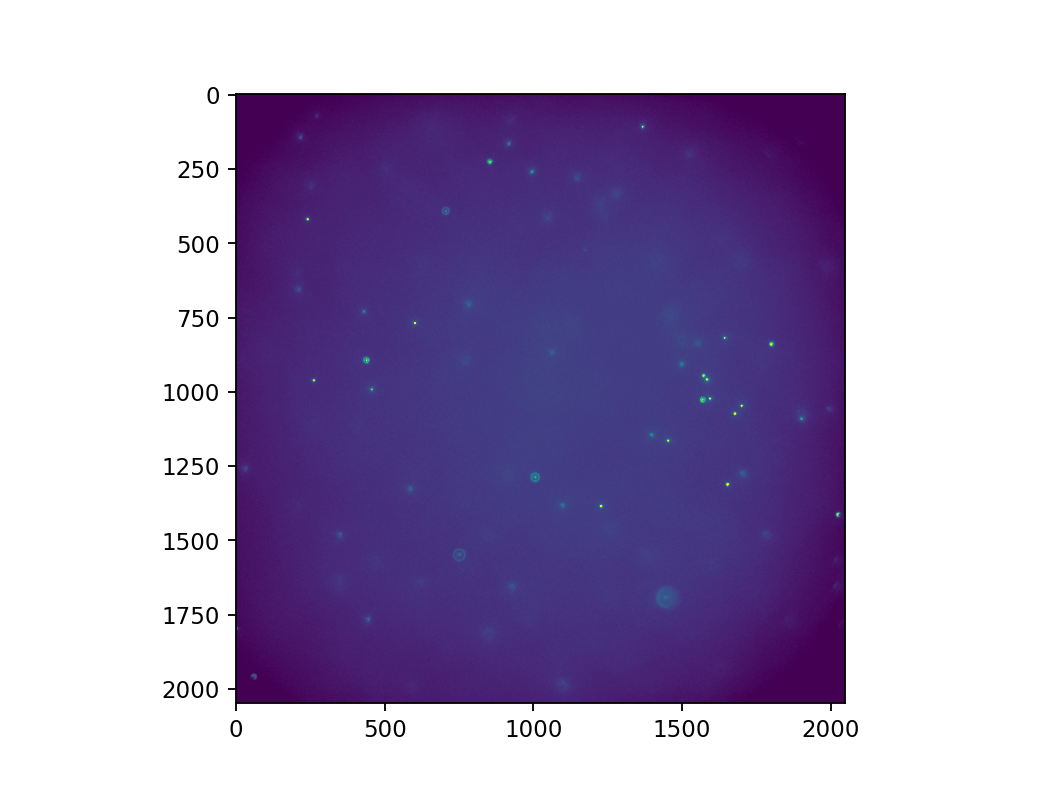

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(daxp_ref.im_488[12], vmin=500, vmax=2000)

<IPython.core.display.Javascript object>


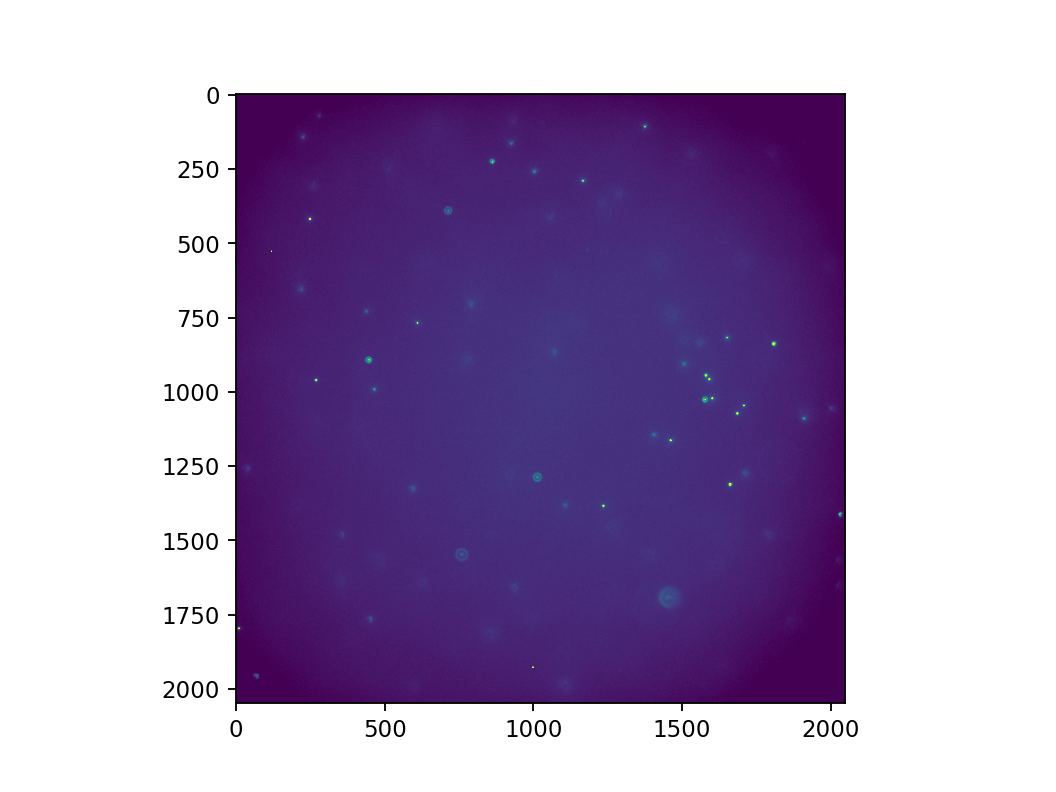

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(daxp.im_488[12], vmin=500, vmax=2000)

<IPython.core.display.Javascript object>


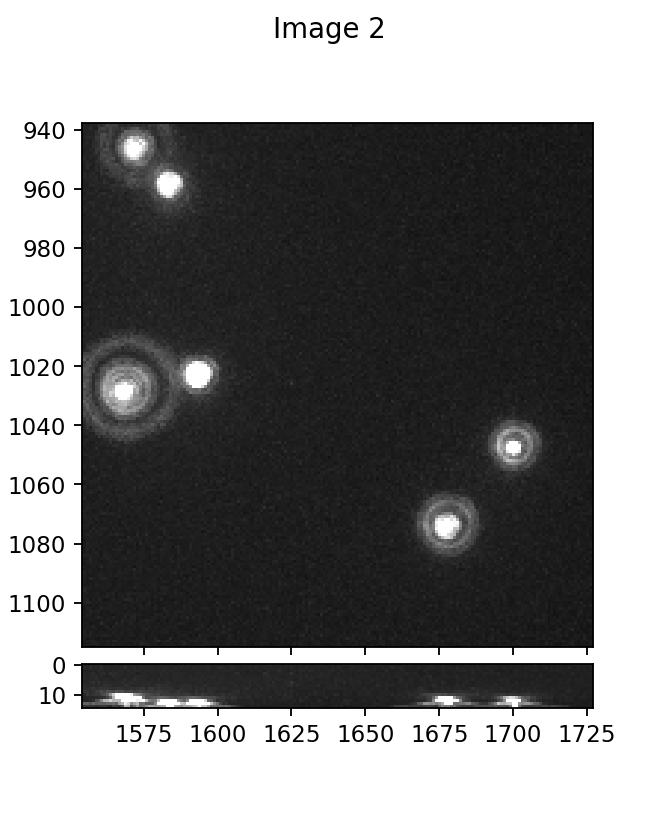

In [6]:
%matplotlib notebook
imshow_mark_3d([daxp.im_488, daxp_ref.im_488],)

In [18]:
ref_Zstep = 12 # start from 0, manually check several images

In [19]:
# Load readout names:
library_folder = r'\\wi-bigdata.wi.mit.edu\solexa_weissman\puzheng\MERFISH_Probes\4T1_MERFISH\C2'
readout_filename = os.path.join(library_folder, 'readouts.csv')
readouts = pd.read_csv(readout_filename) 
# select names
readout_names = readouts['Name'][0:20]

In [20]:
# Generate data organization
data_organization_filename = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Softwares\Weissman_MERFISH_Scripts\merlin_parameters\dataorganization\20230622-C2_20bit.csv'
_do = Data_Organization(data_organization_filename,)
if _do.is_empty():
    # create
    _do.create_from_colorUsage(color_usage_filename, data_folder,ref_Zstep, readout_names=readout_names)
    # save
    _do.save_to_file()

- load color_usage from file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Softwares\Weissman_MERFISH_Scripts\merlin_parameters\dataorganization\20230622-C2_20bit.csv


In [21]:
_do

,channelName,readoutName,imageType,imageRegExp,bitNumber,imagingRound,color,frame,zPos,fiducialImageType,fiducialRegExp,fiducialImagingRound,fiducialFrame,fiducialColor
0,bit1,NaN,750_647_488_405_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,1,0,750,[0 4 8 12 16 20 24 28 32 36 40 44 48 52 56],[0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 13.5 15...,750_647_488_405_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,0,54,488
1,bit2,NaN,750_647_488_405_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,2,0,647,[1 5 9 13 17 21 25 29 33 37 41 45 49 53 57],[0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 13.5 15...,750_647_488_405_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,0,54,488
2,bit3,NaN,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,3,1,750,[0 3 6 9 12 15 18 21 24 27 30 33 36 39 42],[0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 13.5 15...,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,1,41,488
3,bit4,NaN,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,4,1,647,[1 4 7 10 13 16 19 22 25 28 31 34 37 40 43],[0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 13.5 15...,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,1,41,488
4,bit5,NaN,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,5,2,750,[0 3 6 9 12 15 18 21 24 27 30 33 36 39 42],[0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 13.5 15...,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,2,41,488
5,bit6,NaN,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,6,2,647,[1 4 7 10 13 16 19 22 25 28 31 34 37 40 43],[0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 13.5 15...,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,2,41,488
6,bit7,NaN,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,7,3,750,[0 3 6 9 12 15 18 21 24 27 30 33 36 39 42],[0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 13.5 15...,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,3,41,488
7,bit8,NaN,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,8,3,647,[1 4 7 10 13 16 19 22 25 28 31 34 37 40 43],[0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 13.5 15...,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,3,41,488
8,bit9,NaN,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,9,4,750,[0 3 6 9 12 15 18 21 24 27 30 33 36 39 42],[0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 13.5 15...,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,4,41,488
9,bit10,NaN,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,10,4,647,[1 4 7 10 13 16 19 22 25 28 31 34 37 40 43],[0.0 1.5 3.0 4.5 6.0 7.5 9.0 10.5 12.0 13.5 15...,750_647_488_s15,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,4,41,488


## Copy position file

In [8]:
from shutil import copyfile

In [17]:
position_filename = os.path.join(data_folder, 'Experiment', 'positions_all.txt')

target_position_filename = os.path.join(r"../../merlin_parameters/positions/", f"{experiment_date}_positions.txt")

if os.path.isfile(position_filename):
    print(f"source position file: {position_filename}")
    print(f"target position file: {target_position_filename}")
    # copy
    copyfile(position_filename, target_position_filename)

source position file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\4T1Tumor\20230622-4T1tumor_primary_F133section2\Experiment\positions_all.txt
target position file: ../../merlin_parameters/positions/20230622_positions.txt
